# Sentiment Analysis - Lexicon Based

Sentiment Analysis merujuk pada penggunaan *natural language processing*, analisis teks, linguistik komputasional, dan biometrik yang secara sistematis mengidentifikasi, mengekstrak, memperhitungkan dan mempelajari kondisi afektif atau informasi subjektif.

![Sentiment Analysis](./images/sentiment-analysis.jpg)

Sumber: https://www.kdnuggets.com/2018/03/5-things-sentiment-analysis-classification.html

Ada beberapa metode yang biasanya digunakan dalam analisa sentimen, diantaranya adalah:

- Lexicon-Based. Metode ini menggunakan variasi dari kata yang sudah ditandai nilai sentimennya. Dengan metode ini kita tidak perlu melakukan training model, sangat baik jika untuk membuat prototipe aplikasi maupun pada tahap awal pembangunan korpus sentimen.

- Machine Learning-Based. Metode ini menggunaan model machine learning untuk mengklasifikasikan dokumen/teks ke dalam sentimen tertentu. Sangat cocok ketika sudah memiliki korpus yang sangat besar.

- Hybrid-Based. Metode ini mencampurkan kedua metode diatas.

![Sentiment Analysis 2](./images/sentiment-analysis-2.jpg)

Sumber: https://www.kdnuggets.com/2018/03/5-things-sentiment-analysis-classification.html


## Alur Kerja Sentiment Analysis

Alur kerja klasik dari sentiment analysis dapat dilihat pada gambar berikut:

![Sentiment Analysis 3](./images/sentiment-analysis-3.png)

Sumber: https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python

## Load Library

In [2]:
import pandas as pd
import gensim

## Load Dataset

In [4]:
raw_data = pd.read_csv("./data/berita.csv", delimiter=';')

raw_data = raw_data.dropna()

raw_data.head()

,judul,tanggal,isi_berita
0,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",2019-03-25,Pemerintah meminta dunia usaha khususnya para ...
1,"KKP Terus Lakukan Langkah Masif, Produksi Tuna...",2019-03-25,Indonesia telah mengalami peningkatan produksi...
2,"Ada Aturan Besaran Tarif Ojek Online, Bagaiman...",2019-03-25,Kementerian Perhubungan (Kemenhub) telah menet...
3,Aplikator Boleh Patok Harga Lebih Besar 20 Per...,2019-03-25,Dirjen Perhubungan Darat Kementerian Perhubung...
4,"Menurut Bill Gates, Lakukan Trik Ini agar Suks...",2019-03-25,Pendiri Microsoft dan miliarder Bill Gates me...


## Load Dataset Sentimen

In [5]:
sentimen = pd.read_csv('./data/sentimen.csv')

sentimen.head()

,kata,sentimen
0,a+,positif
1,acungan jempol,positif
2,adaptif,positif
3,adil,positif
4,afinitas,positif


## Simple Preprocess

In [6]:
raw_data['isi_berita'] = raw_data['isi_berita'].apply(lambda x: gensim.utils.simple_preprocess(x)).copy()
raw_data

,judul,tanggal,isi_berita
0,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",2019-03-25,"[pemerintah, meminta, dunia, usaha, khususnya,..."
1,"KKP Terus Lakukan Langkah Masif, Produksi Tuna...",2019-03-25,"[indonesia, telah, mengalami, peningkatan, pro..."
2,"Ada Aturan Besaran Tarif Ojek Online, Bagaiman...",2019-03-25,"[kementerian, perhubungan, kemenhub, telah, me..."
3,Aplikator Boleh Patok Harga Lebih Besar 20 Per...,2019-03-25,"[dirjen, perhubungan, darat, kementerian, perh..."
4,"Menurut Bill Gates, Lakukan Trik Ini agar Suks...",2019-03-25,"[pendiri, microsoft, dan, miliarder, bill, gat..."
...,...,...,...
514,Aprindo: Konsumen Indonesia Makin Berwawasan,2019-03-11,"[turunnya, pertumbuhan, perdagangan, ritel, se..."
515,"Meski Jauh dari Target, Ekonomi Indonesia Cata...",2019-03-11,"[pertumbuhan, ekonomi, indonesia, terus, posit..."
516,"Siap-Siap, Mobil Murah Bakal Dikenakan Pajak P...",2019-03-11,"[insiatif, fiskal, berupa, pajak, penjualan, a..."
517,UOB Gandeng Aplikasi UrbanAce,2019-03-11,"[uob, indonesia, menggandeng, aplikasi, selule..."


**Ambil Kolom ```judul``` dan ```isi_berita```**

In [7]:
analisa = raw_data.iloc[:,[0,2]]

analisa

,judul,isi_berita
0,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...","[pemerintah, meminta, dunia, usaha, khususnya,..."
1,"KKP Terus Lakukan Langkah Masif, Produksi Tuna...","[indonesia, telah, mengalami, peningkatan, pro..."
2,"Ada Aturan Besaran Tarif Ojek Online, Bagaiman...","[kementerian, perhubungan, kemenhub, telah, me..."
3,Aplikator Boleh Patok Harga Lebih Besar 20 Per...,"[dirjen, perhubungan, darat, kementerian, perh..."
4,"Menurut Bill Gates, Lakukan Trik Ini agar Suks...","[pendiri, microsoft, dan, miliarder, bill, gat..."
...,...,...
514,Aprindo: Konsumen Indonesia Makin Berwawasan,"[turunnya, pertumbuhan, perdagangan, ritel, se..."
515,"Meski Jauh dari Target, Ekonomi Indonesia Cata...","[pertumbuhan, ekonomi, indonesia, terus, posit..."
516,"Siap-Siap, Mobil Murah Bakal Dikenakan Pajak P...","[insiatif, fiskal, berupa, pajak, penjualan, a..."
517,UOB Gandeng Aplikasi UrbanAce,"[uob, indonesia, menggandeng, aplikasi, selule..."


**Ubah list setiap ```isi_berita``` menjadi ```record```**

In [8]:
type(analisa)

pandas.core.frame.DataFrame

In [9]:
pd.__version__

'0.25.3'

In [10]:
analisa = analisa.explode('isi_berita')

analisa

,judul,isi_berita
0,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",pemerintah
0,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",meminta
0,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",dunia
0,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",usaha
0,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",khususnya
...,...,...
518,BSM Targetkan Pertumbuhan KPR di Atas 10 Perse...,bank
518,BSM Targetkan Pertumbuhan KPR di Atas 10 Perse...,syariah
518,BSM Targetkan Pertumbuhan KPR di Atas 10 Perse...,mandiri
518,BSM Targetkan Pertumbuhan KPR di Atas 10 Perse...,kusman


**Lakukan proses inner join antara objek ```analisa``` dan ```sentimen```**

In [11]:
hasil_join = pd.merge(left=analisa, right=sentimen, left_on='isi_berita', right_on='kata')

hasil_join

,judul,isi_berita,kata,sentimen
0,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",menggugat,menggugat,negatif
1,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",menggugat,menggugat,negatif
2,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",menggugat,menggugat,negatif
3,"Lawan Diskriminasi CPO, Pemerintah Ajak Pebisn...",disahkan,disahkan,positif
4,"CPO Didiskriminasi, Pemerintah Galang Dukungan...",disahkan,disahkan,positif
...,...,...,...,...
15897,Astra Akan Beri Hadiah Bagi Generasi Muda yang...,diam,diam,positif
15898,Astra Akan Beri Hadiah Bagi Generasi Muda yang...,diam,diam,negatif
15899,"Gandeng Pihak Swasta, Kemendag Perkuat Akses U...",tangkas,tangkas,positif
15900,"Pesawat Ethiopian Airlines Jatuh, Saham Boeing...",terberat,terberat,positif


**Agregasi Sentimen**

In [12]:
hasil_join = hasil_join.iloc[:,[0,3]].assign(nilai_sentimen=0).groupby(['judul','sentimen'], as_index=False).count()

hasil_join

,judul,sentimen,nilai_sentimen
0,"""Corn Planter"", Ini Mesin yang Berperan Mening...",negatif,10
1,"""Corn Planter"", Ini Mesin yang Berperan Mening...",positif,19
2,"""Market Cap"" Tembus Rp 500 Triliun, BRI Cetak ...",negatif,6
3,"""Market Cap"" Tembus Rp 500 Triliun, BRI Cetak ...",positif,14
4,10 Cara Ini Bikin Anda Tanpa Sadar Berhemat,negatif,32
...,...,...,...
1020,[POPULER MONEY] Skandal Seks Pengaruhi Saham P...,positif,15
1021,[POPULER MONEY] Tips Berburu Tiket Pesawat Mur...,negatif,18
1022,[POPULER MONEY] Tips Berburu Tiket Pesawat Mur...,positif,26
1023,“Upgrade” Metode Pelatihan Kerja Agar Masyarak...,negatif,2


**Ubah dari ```pivot_table``` kembali ke bentuk ```dataframe```**

In [13]:
hasil_join = hasil_join.pivot_table(index='judul', columns='sentimen', values='nilai_sentimen', fill_value=0).to_records()

hasil_join

rec.array([('"Corn Planter", Ini Mesin yang Berperan Meningkatkan Produksi Jagung!', 10, 19),
           ('"Market Cap" Tembus Rp 500 Triliun, BRI Cetak Rekor Baru Pekan Ini',  6, 14),
           ('10 Cara Ini Bikin Anda Tanpa Sadar Berhemat', 32, 30),
           ('10 Pesawat Boeing 737 Max 8 Alami "Grounding," Operasional Lion Air Normal',  3,  7),
           ('10.000 Pengusaha Deklarasi Dukung Jokowi-Ma\'ruf, Sofjan Wanandi Bilang "Kami Ingin yang Pasti-pasti Saja"', 18, 28),
           ('3 Cara Menabung Simpel yang Bikin Kamu Cepat Kaya', 42, 45),
           ('3 Konglomerat Media Online Dominasi Populasi Digital Indonesia',  1,  4),
           ('35 Perusahaan Dalam Negeri Buka 10.100 Pekerjaan Selama 2018',  4, 15),
           ('5 Cara Milenial Memaknai Kekayaan, Apa Saja?', 32, 57),
           ('5 Langkah yang Perlu Disiapkan Perempuan Sebelum Pensiun', 37, 44),
           ('5 Perusahaan Teknologi dengan Lingkungan Kerja Terbaik, Ini Daftarnya', 14, 21),
           ('6 Cara Simpel 

**Membuat kolom baru ```sentimen```**

In [14]:
hasil_join = pd.DataFrame(hasil_join).assign(sentimen=0)

hasil_join

,judul,negatif,positif,sentimen
0,"""Corn Planter"", Ini Mesin yang Berperan Mening...",10,19,0
1,"""Market Cap"" Tembus Rp 500 Triliun, BRI Cetak ...",6,14,0
2,10 Cara Ini Bikin Anda Tanpa Sadar Berhemat,32,30,0
3,"10 Pesawat Boeing 737 Max 8 Alami ""Grounding,""...",3,7,0
4,10.000 Pengusaha Deklarasi Dukung Jokowi-Ma'ru...,18,28,0
...,...,...,...,...
511,[POPULER MONEY] Lowongan di BUMN| Gaji Baru Po...,2,1,0
512,[POPULER MONEY] RI Resmi Larang Terbang Boeing...,3,1,0
513,[POPULER MONEY] Skandal Seks Pengaruhi Saham P...,19,15,0
514,[POPULER MONEY] Tips Berburu Tiket Pesawat Mur...,18,26,0


**Hitung nilai sentimen**

In [15]:
hasil_join['sentimen'] = hasil_join['positif'] - hasil_join['negatif']
hasil_join

,judul,negatif,positif,sentimen
0,"""Corn Planter"", Ini Mesin yang Berperan Mening...",10,19,9
1,"""Market Cap"" Tembus Rp 500 Triliun, BRI Cetak ...",6,14,8
2,10 Cara Ini Bikin Anda Tanpa Sadar Berhemat,32,30,-2
3,"10 Pesawat Boeing 737 Max 8 Alami ""Grounding,""...",3,7,4
4,10.000 Pengusaha Deklarasi Dukung Jokowi-Ma'ru...,18,28,10
...,...,...,...,...
511,[POPULER MONEY] Lowongan di BUMN| Gaji Baru Po...,2,1,-1
512,[POPULER MONEY] RI Resmi Larang Terbang Boeing...,3,1,-2
513,[POPULER MONEY] Skandal Seks Pengaruhi Saham P...,19,15,-4
514,[POPULER MONEY] Tips Berburu Tiket Pesawat Mur...,18,26,8


In [16]:
# melihat sentimen 10 berita pertama
hasil_join[['judul','sentimen']].iloc[0:10].plot.barh(x='judul',y='sentimen');

**Plot menggunakan seaborn**

In [17]:
def warna(sentimen):
    war = []
    for sent in sentimen:
        if sent >=0:
            war.append("positif")
        else:
            war.append("negatif")
    return war

In [18]:
hasil_join = hasil_join[['judul','sentimen']].assign(warna=warna(hasil_join['sentimen'].tolist()))

hasil_join

,judul,sentimen,warna
0,"""Corn Planter"", Ini Mesin yang Berperan Mening...",9,positif
1,"""Market Cap"" Tembus Rp 500 Triliun, BRI Cetak ...",8,positif
2,10 Cara Ini Bikin Anda Tanpa Sadar Berhemat,-2,negatif
3,"10 Pesawat Boeing 737 Max 8 Alami ""Grounding,""...",4,positif
4,10.000 Pengusaha Deklarasi Dukung Jokowi-Ma'ru...,10,positif
...,...,...,...
511,[POPULER MONEY] Lowongan di BUMN| Gaji Baru Po...,-1,negatif
512,[POPULER MONEY] RI Resmi Larang Terbang Boeing...,-2,negatif
513,[POPULER MONEY] Skandal Seks Pengaruhi Saham P...,-4,negatif
514,[POPULER MONEY] Tips Berburu Tiket Pesawat Mur...,8,positif


In [19]:
import seaborn as sns

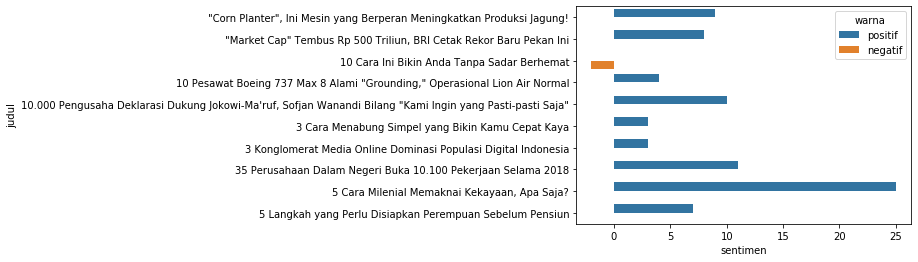

In [20]:
sns.barplot(x='sentimen', y='judul', hue='warna', data=hasil_join.iloc[0:10,]);